In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [2]:
df=pd.read_csv("data.csv")

C:\Users\AA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [4]:
df.drop(columns=['time_period','time_period_type'],inplace=True)

In [5]:
df.head()


,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [6]:
final=df.query("location=='Argentina-Catamarca' & data_field_code== 'AR0005' ")
final


,report_date,location,location_type,data_field,data_field_code,value,unit
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases


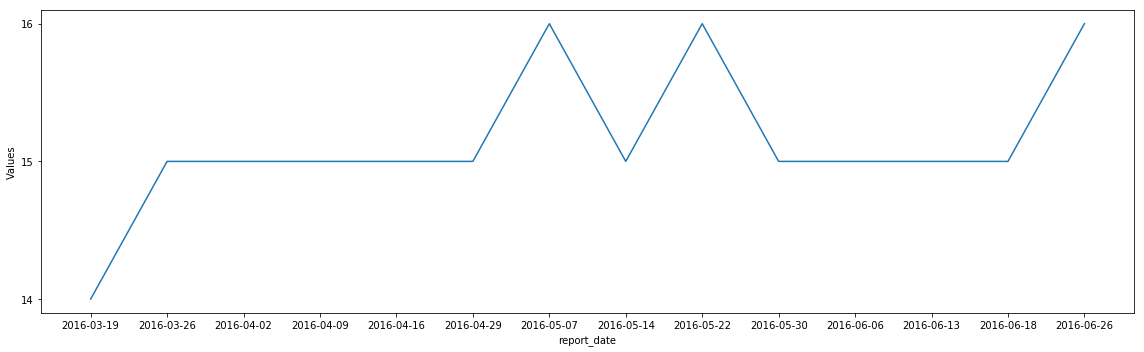

In [7]:
plt.figure(figsize=(16,5))
plt.xlabel('report_date')
plt.ylabel('Values')
plt.plot(final['report_date'],final['value'])
plt.tight_layout()

# 2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

In [8]:
df.dtypes

report_date        object
location           object
location_type      object
data_field         object
data_field_code    object
value              object
unit               object
dtype: object

In [9]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [10]:
df.dtypes

report_date         object
location            object
location_type       object
data_field          object
data_field_code     object
value              float64
unit                object
dtype: object

<BarContainer object of 14 artists>

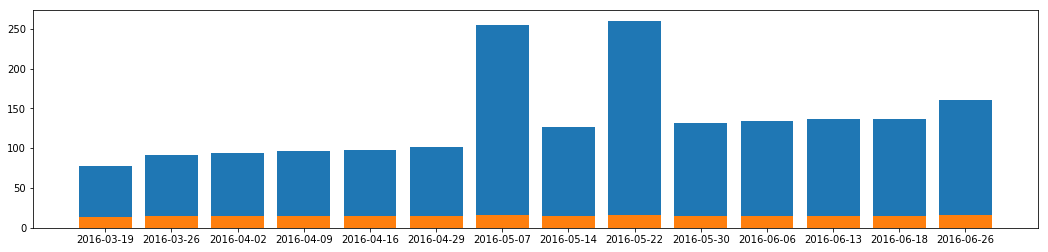

In [11]:
s=df[df.unit=='cases']
s=s[['report_date','location','value']]
s1=s.query("location=='Argentina-CABA'")
s2=s.query("location=='Argentina-Catamarca'")
s3=s1.groupby('report_date', as_index=False).sum()
s4=s2.groupby('report_date', as_index=False).sum()
plt.figure(figsize=(18,4))
plt.bar(s3.report_date,s3.value)
plt.bar(s4.report_date,s4.value)

# 3 Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [12]:
df.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2.0,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1.0,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127.0,cases


In [13]:
q1=df.query("location=='Argentina-Buenos_Aires' | location=='Argentina-CABA'| location=='Argentina-Catamarca'")
new=q1.groupby(['data_field','location'],as_index=False)['value'].sum()
l = list(new.data_field.unique())
new

,data_field,location,value
0,cumulative_cases_discarded,Argentina-Buenos_Aires,251.0
1,cumulative_cases_discarded,Argentina-CABA,27.0
2,cumulative_cases_discarded,Argentina-Catamarca,0.0
3,cumulative_cases_under_study,Argentina-Buenos_Aires,2981.0
4,cumulative_cases_under_study,Argentina-CABA,1748.0
5,cumulative_cases_under_study,Argentina-Catamarca,212.0
6,cumulative_confirmed_imported_cases,Argentina-Buenos_Aires,32.0
7,cumulative_confirmed_imported_cases,Argentina-CABA,124.0
8,cumulative_confirmed_imported_cases,Argentina-Catamarca,0.0
9,cumulative_confirmed_local_cases,Argentina-Buenos_Aires,0.0


In [14]:
new.set_index('data_field',inplace=True)


In [15]:
new

,location,value
data_field,,
cumulative_cases_discarded,Argentina-Buenos_Aires,251.0
cumulative_cases_discarded,Argentina-CABA,27.0
cumulative_cases_discarded,Argentina-Catamarca,0.0
cumulative_cases_under_study,Argentina-Buenos_Aires,2981.0
cumulative_cases_under_study,Argentina-CABA,1748.0
cumulative_cases_under_study,Argentina-Catamarca,212.0
cumulative_confirmed_imported_cases,Argentina-Buenos_Aires,32.0
cumulative_confirmed_imported_cases,Argentina-CABA,124.0
cumulative_confirmed_imported_cases,Argentina-Catamarca,0.0


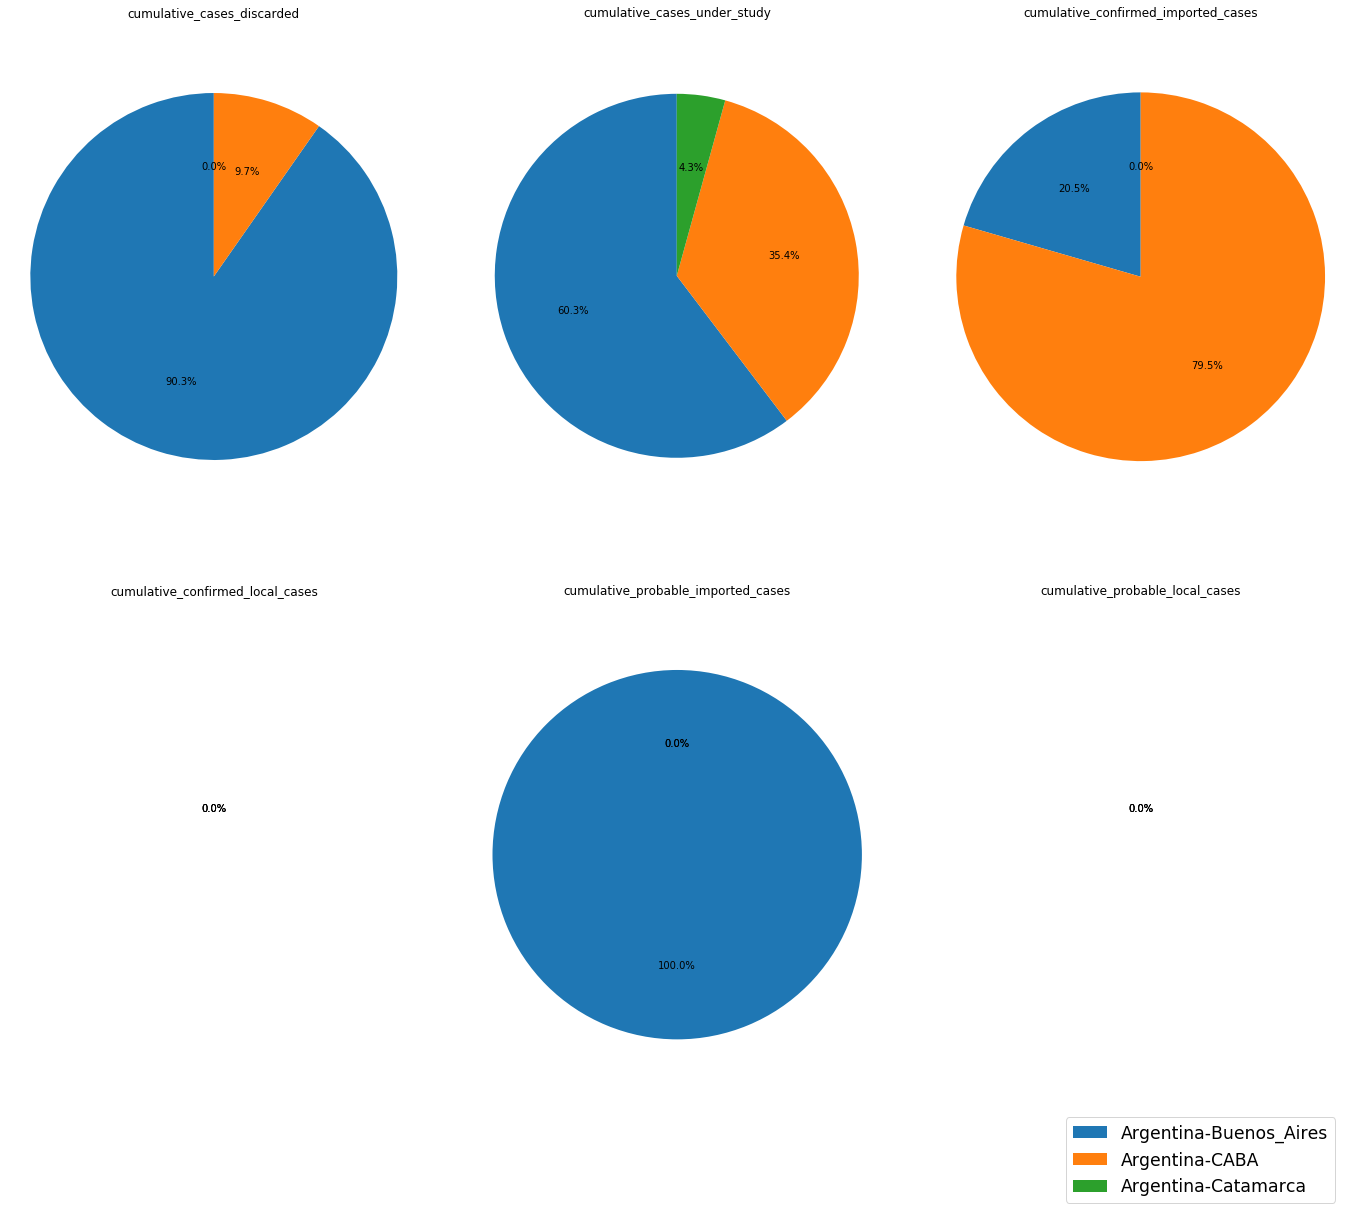

In [16]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,18))
k=0
for i in range(2):
    for j in range(3):
        temp=new.loc[l[k]]
        axes[i][j].pie(temp['value'],autopct="%1.1f%%", startangle=90)
        axes[i][j].title.set_text(l[k])
        axes[i][j].axis('equal')
        k+=1
plt.legend(labels=temp['location'], bbox_to_anchor=(1.0,0.0) ,fontsize='xx-large')
plt.tight_layout(pad=5)

C:\Users\AA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\AA\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

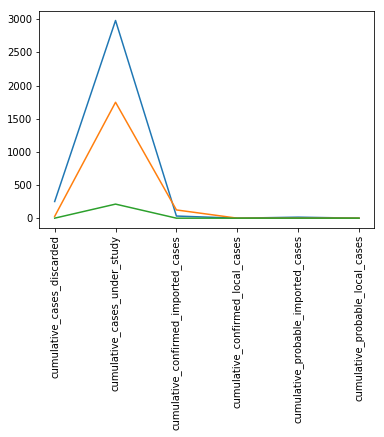

In [17]:

query=df.query("location=='Argentina-Buenos_Aires' | location=='Argentina-CABA' | location=='Argentina-Catamarca' ")
query[['value']]=pd.to_numeric(query['value'])
newData=query.groupby(['location','data_field'],as_index=False)['value'].sum()
newData.set_index('location',inplace=True)

plt.plot(newData.loc['Argentina-Buenos_Aires']['data_field'],newData.loc['Argentina-Buenos_Aires']['value'])
plt.plot(newData.loc['Argentina-CABA']['data_field'],newData.loc['Argentina-CABA']['value'])
plt.plot(newData.loc['Argentina-Catamarca']['data_field'],newData.loc['Argentina-Catamarca']['value'])
plt.xticks(rotation='vertical')

In [18]:
#4

In [ ]:
from difflib import get_close_matches 

def closeMatches(patterns, word): 
     print("Matching pattern words are:" , get_close_matches(word, patterns)) 

with open('big.txt')as file:
    data=file.read()
    ls=[]
    for word in data.split():
        ls.append(word)
    file.close()
    
with open('words.txt')as file:
    data=file.read()
    l=[]
    for word in data.split():
        l.append(word)
    file.close()
ls = list(dict.fromkeys(ls))
# main program 
if __name__ == "__main__": 
    word = input("Enter word: ")
    #patterns = ['ape', 'apple', 'peach', 'puppy']
    if word not in l:
        closeMatches(ls, word)
    else:
        print("Word is correct")